In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import accuracy_score

In [208]:
df = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [209]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [210]:
df["FUEL"] = df["FUEL"].astype("category")
df["FUEL"] = df["FUEL"].cat.codes
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1


In [212]:
sd = StandardScaler()
df[["SIZE", "FUEL", 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']] = sd.fit_transform(df[["SIZE", "FUEL", 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']])

In [214]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,-1.377422,-1.185276,-1.643168,-0.046442,-1.472885,2.072201,0
1,-1.377422,-1.185276,-1.643168,-0.046442,-1.472885,1.928925,1
2,-1.377422,-1.185276,-1.643168,-0.046442,-0.923903,1.833407,1
3,-1.377422,-1.185276,-1.643168,-0.046442,-0.797214,1.737890,1
4,-1.377422,-1.185276,-1.643168,1.545942,-0.522723,1.690131,1
...,...,...,...,...,...,...,...
17437,2.049335,0.493865,1.643168,-1.271352,-1.008361,-1.270915,0
17438,2.049335,0.493865,1.643168,-1.516334,-1.050591,-1.318674,0
17439,2.049335,0.493865,1.643168,-2.006298,-1.156165,-1.366432,0
17440,2.049335,0.493865,1.643168,-2.496262,-1.388426,-1.414191,0


In [215]:
x = df.iloc[:,:-1].values.tolist()

In [216]:
o = df.iloc[:,-1].values.tolist()

In [268]:
n1 = len(x[0])
lr = 0.000001

In [269]:
b = []
for i in range(n1):
  b.append(round(random.random(),3))

In [270]:
w = []
for j in range(n1):
  w.append(round(random.random(),3))

In [275]:
def activationFunction(x):
  if(x < 0.85):
    return 0
  else:
    return 1

In [276]:
Y = []
e = 5
for i in range(e):                   #epochs
  Y.append([])
  for j in range(len(x)):            #inputs
    yin =  0
    for k in range(n1):
      yin += x[j][k]*w[k]
    Y[-1].append(activationFunction(yin))
    if(Y[-1][-1] != o[j]):
      t = Y[-1][-1] - o[j]
      for p in range(n1):
        w[p] = w[p] + (lr*t)*x[j][p]
        b[p] = b[p] + lr*t

In [277]:
print(accuracy_score(Y[-1],o))

0.6338149294805642


<Axes: >

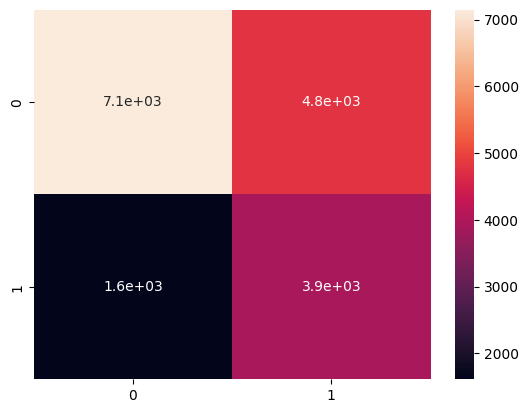

In [278]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(Y[-1],o)

import seaborn as sns
sns.heatmap(cm, annot = True)